# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Dataset ini berisi informasi detail mengenai spesifikasi dan harga mobil bekas, yang mencakup berbagai merek, model, tahun pembuatan, serta kondisi teknis kendaraan untuk mendukung analisis prediksi harga.

   Dataset ini diambil dari kaggle : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
url='https://drive.google.com/uc?id=1Kdl_ONXOb-NaLblhXbErvT0VLWkkYemt'
df = pd.read_csv(url)

In [ ]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

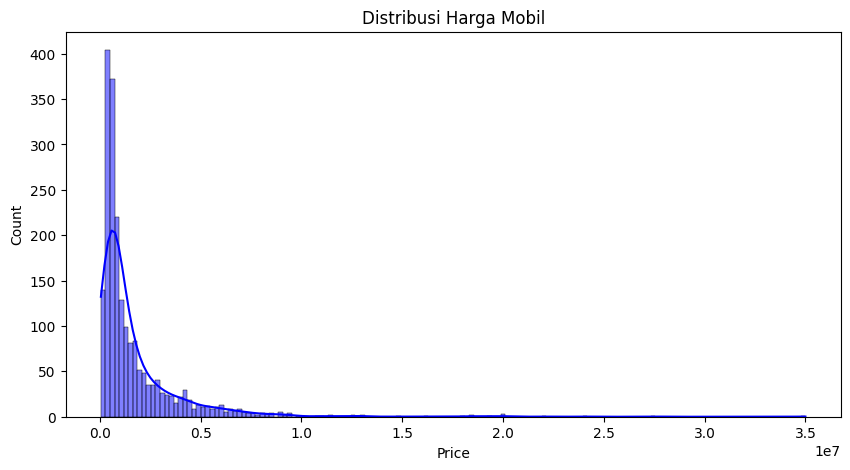

In [ ]:
# Visualisasi Distribusi Harga (Target)
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribusi Harga Mobil')
plt.show()

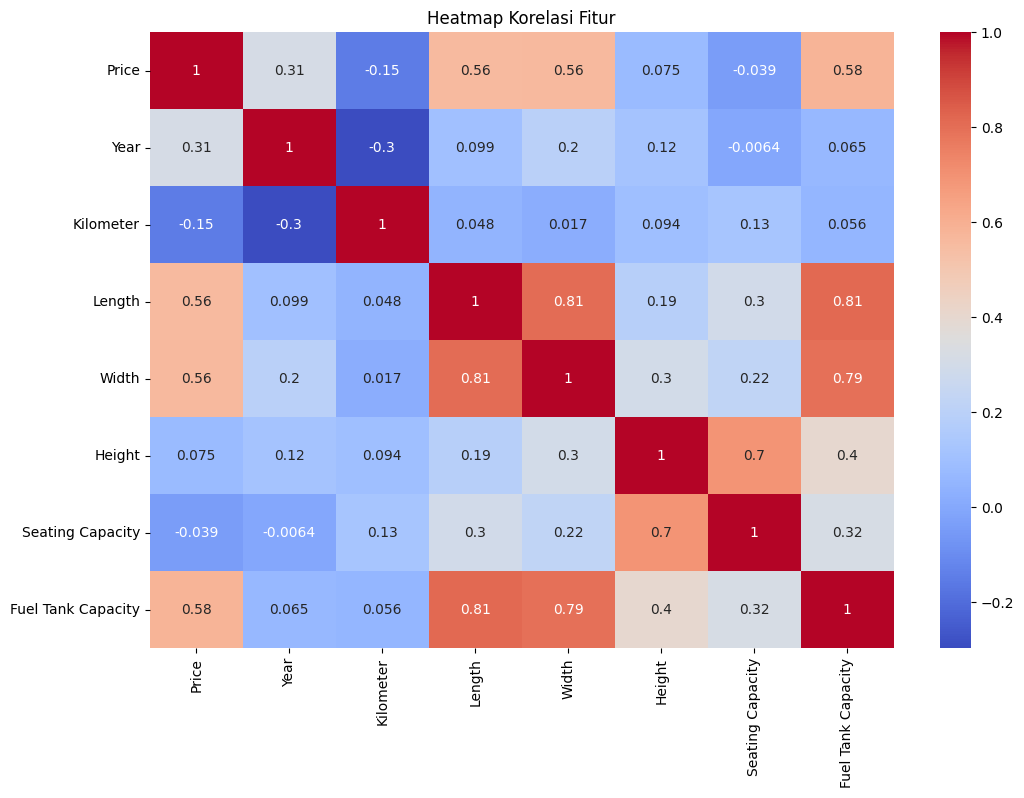

In [ ]:
# Korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

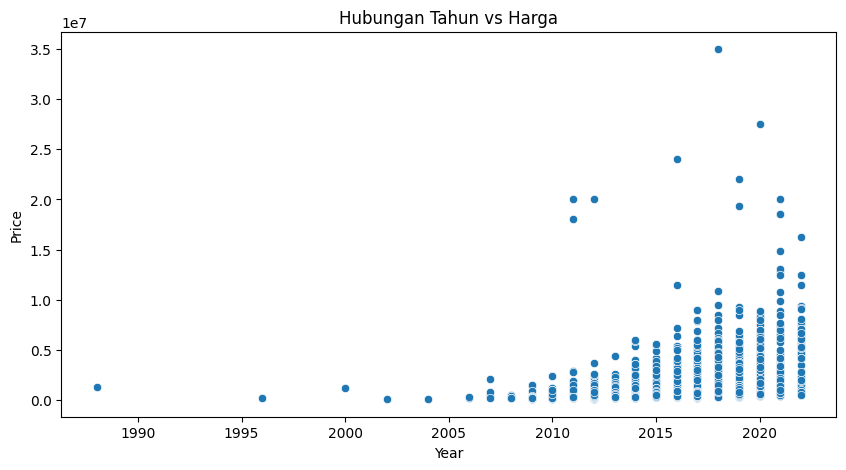

In [ ]:
# Melihat hubungan Tahun dan Harga
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Year', y='Price')
plt.title('Hubungan Tahun vs Harga')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# DATA CLEANING (Ekstraksi angka dari string)
cols_to_fix = ['Engine', 'Max Power', 'Max Torque']

for col in cols_to_fix:
    df[col] = df[col].astype(str)

print("Sedang mengekstrak angka dari kolom teks...")

df['Engine'] = df['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max Power'] = df['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max Torque'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)').astype(float)

print("\nHasil ekstraksi (5 baris pertama):")
display(df[['Engine', 'Max Power', 'Max Torque']].head())

print("\nJumlah nilai kosong setelah ekstraksi:")
print(df[['Engine', 'Max Power', 'Max Torque']].isnull().sum())

Sedang mengekstrak angka dari kolom teks...

Hasil ekstraksi (5 baris pertama):


,Engine,Max Power,Max Torque
0,1198.0,87.0,109.0000
1,1248.0,74.0,190.0000
2,1197.0,79.0,112.7619
3,1197.0,82.0,113.0000
4,2393.0,148.0,343.0000



Jumlah nilai kosong setelah ekstraksi:
Engine        80
Max Power     80
Max Torque    80
dtype: int64


In [ ]:
# HANDLING MISSING VALUES

# Cek total missing values per kolom
print("Jumlah data kosong sebelum imputasi:")
print(df.isnull().sum())

# Daftar kolom numerik yang akan diisi dengan median
cols_to_impute = ['Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

for col in cols_to_impute:
    # Mengisi dengan nilai tengah (median)
    df[col] = df[col].fillna(df[col].median())

# Untuk kolom kategorikal (Drivetrain), kita isi dengan 'Unknown' atau modus
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])

print("\nJumlah data kosong setelah imputasi:")
print(df.isnull().sum())

Jumlah data kosong sebelum imputasi:
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

Jumlah data kosong setelah imputasi:
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width   

In [ ]:
# HANDLING DUPLICATES
# Mengecek jumlah data duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat yang ditemukan: {duplicate_count}")

# Menampilkan baris yang duplikat (opsional, untuk inspeksi)
if duplicate_count > 0:
    print("\nContoh data yang duplikat:")
    display(df[df.duplicated()].head())

    # Menghapus data duplikat
    # keep='first' artinya baris pertama tetap disimpan, sisanya dihapus
    df.drop_duplicates(inplace=True)
    print(f"\nData duplikat telah dihapus. Jumlah baris sekarang: {len(df)}")
else:
    print("\nTidak ditemukan data duplikat.")

Jumlah data duplikat yang ditemukan: 0

Tidak ditemukan data duplikat.


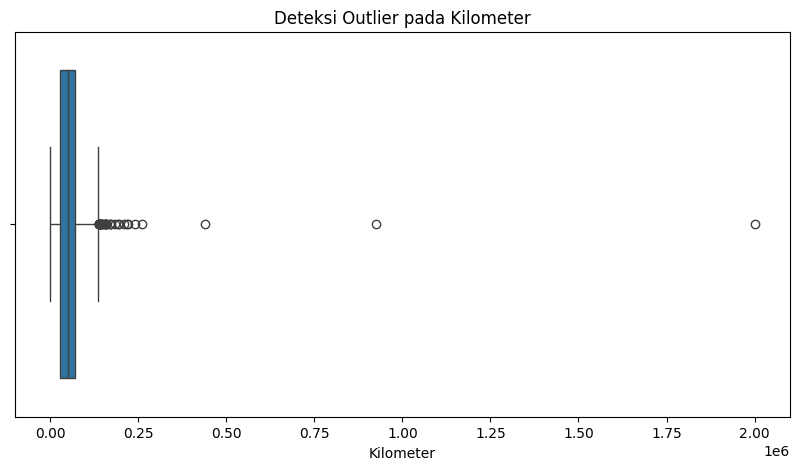

In [ ]:
# OUTLIER DETECTION
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Kilometer'])
plt.title('Deteksi Outlier pada Kilometer')
plt.show()

In [ ]:
# HANDLING OUTLIERS
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Menghapus outlier pada kolom Price dan Kilometer
print(f"Jumlah data sebelum: {len(df)}")
df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Kilometer')
print(f"Jumlah data setelah menghapus outlier: {len(df)}")

Jumlah data sebelum: 2059
Jumlah data setelah menghapus outlier: 1804


In [ ]:
# FEATURE ENGINEERING
import datetime

# Mendapatkan tahun saat ini
current_year = datetime.datetime.now().year

# Menghitung usia mobil
df['Car_Age'] = current_year - df['Year']

# Menghapus kolom 'Year' yang lama
df.drop('Year', axis=1, inplace=True)

print("Fitur 'Car_Age' berhasil dibuat.")
display(df[['Car_Age']].head())

Fitur 'Car_Age' berhasil dibuat.


,Car_Age
0,8
1,11
2,14
3,6
4,7


In [ ]:
# SCALING (STANDARISASI & NORMALISASI)
# STANDARISASI (StandardScaler)
# Digunakan untuk fitur yang rentangnya sangat lebar
std_scaler = StandardScaler()
cols_to_std = ['Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Car_Age', 'Price']

# Simpan hasil standarisasi ke dalam kolom yang sama
df[cols_to_std] = std_scaler.fit_transform(df[cols_to_std])

# NORMALISASI (MinMaxScaler)
# Digunakan untuk fitur dimensi fisik dan kapasitas
mm_scaler = MinMaxScaler()
cols_to_norm = ['Length', 'Width', 'Height', 'Fuel Tank Capacity', 'Seating Capacity']

df[cols_to_norm] = mm_scaler.fit_transform(df[cols_to_norm])

print("Penskalaan data selesai.")
display(df[cols_to_std + cols_to_norm].head())

Penskalaan data selesai.


,Kilometer,Engine,Max Power,Max Torque,Car_Age,Price,Length,Width,Height,Fuel Tank Capacity,Seating Capacity
0,1.238478,-0.721893,-0.614052,-0.933432,-0.250998,-0.649243,0.413841,0.289548,0.297994,0.235294,0.500000
1,0.796662,-0.628319,-0.889919,-0.236072,0.651595,-0.711004,0.416163,0.310734,0.369628,0.317647,0.500000
2,0.505755,-0.723765,-0.783816,-0.901045,1.554188,-0.969276,0.225732,0.169492,0.362464,0.235294,0.500000
3,-0.566967,-0.723765,-0.720155,-0.898995,-0.852727,-0.319103,0.416163,0.381356,0.305158,0.258824,0.500000
4,0.578481,1.514525,0.680403,1.081165,-0.551863,0.973382,0.759870,0.501412,0.713467,0.470588,0.833333


In [ ]:
# DATA BINNING
# Kita buat kategori dari Kilometer sebelum semua teks diubah jadi angka
labels = ['Low_Mileage', 'Moderate_Mileage', 'High_Mileage']
df['Kilometer_Category'] = pd.qcut(df['Kilometer'], q=3, labels=labels)

print("Kolom 'Kilometer_Category' berhasil dibuat.")
display(df[['Kilometer', 'Kilometer_Category']].head())

Kolom 'Kilometer_Category' berhasil dibuat.


,Kilometer,Kilometer_Category
0,1.238478,High_Mileage
1,0.796662,High_Mileage
2,0.505755,High_Mileage
3,-0.566967,Low_Mileage
4,0.578481,High_Mileage


In [ ]:
# ENCODING DATA KATEGORIKAL
categorical_cols = [
    'Fuel Type',
    'Transmission',
    'Owner',
    'Drivetrain',
    'Seller Type',
    'Kilometer_Category'
]

# drop_first=True digunakan untuk efisiensi (menghindari redudansi data)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

cols_to_drop = ['Make', 'Model', 'Location', 'Color']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

print("Proses Encoding Selesai!")
print(f"Jumlah kolom saat ini: {df.shape[1]}")
print("\nContoh 5 baris pertama data yang sudah menjadi angka (0 dan 1):")
display(df.head())

# Cek tipe data untuk memastikan semuanya sudah numerik (int, float, atau uint8)
print("\nInformasi tipe data akhir:")
print(df.dtypes.value_counts())

Proses Encoding Selesai!
Jumlah kolom saat ini: 30

Contoh 5 baris pertama data yang sudah menjadi angka (0 dan 1):


,Price,Kilometer,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_FWD,Drivetrain_RWD,Seller Type_Corporate,Seller Type_Individual,Kilometer_Category_Moderate_Mileage,Kilometer_Category_High_Mileage
0,-0.649243,1.238478,-0.721893,-0.614052,-0.933432,0.413841,0.289548,0.297994,0.500000,0.235294,...,False,False,False,False,True,False,True,False,False,True
1,-0.711004,0.796662,-0.628319,-0.889919,-0.236072,0.416163,0.310734,0.369628,0.500000,0.317647,...,False,True,False,False,True,False,False,True,False,True
2,-0.969276,0.505755,-0.723765,-0.783816,-0.901045,0.225732,0.169492,0.362464,0.500000,0.235294,...,False,False,False,False,True,False,False,True,False,True
3,-0.319103,-0.566967,-0.723765,-0.720155,-0.898995,0.416163,0.381356,0.305158,0.500000,0.258824,...,False,False,False,False,True,False,False,True,False,False
4,0.973382,0.578481,1.514525,0.680403,1.081165,0.759870,0.501412,0.713467,0.833333,0.470588,...,False,False,False,False,False,True,False,True,False,True



Informasi tipe data akhir:
bool       19
float64    11
Name: count, dtype: int64


In [ ]:
from google.colab import files
file_name = 'car details v4_preprocessing.csv'
df.to_csv(file_name, index=False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>